In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cov=pd.read_csv('project9_covid.csv',parse_dates=['Last_Update'])
df_cov=pd.DataFrame(df_cov)
df_cov.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


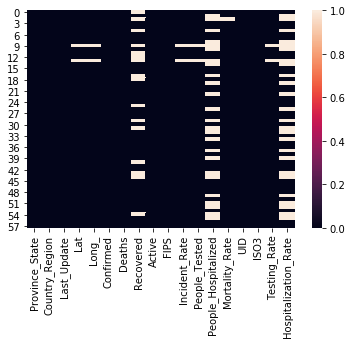

In [3]:
#checking for any missing data
sns.heatmap(df_cov.isnull())

In [4]:
df_cov.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [5]:
df_cov['Hospitalization_Rate'].replace(np.NaN,df_cov['Hospitalization_Rate'].mean(),inplace=True)

In [6]:
df_cov['People_Hospitalized'].replace(np.NaN,((df_cov['Hospitalization_Rate']*df_cov['Confirmed'])/100),inplace=True)

In [7]:
df_cov['Testing_Rate'].replace(np.NaN,df_cov['Testing_Rate'].mean(),inplace=True)

In [8]:
df_cov['Recovered'].replace(np.NaN,(df_cov['Confirmed']-df_cov['Active']-df_cov['Deaths']),inplace=True)

In [9]:
df_cov.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           2
People_Tested           2
People_Hospitalized     0
Mortality_Rate          1
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [10]:
df_cov.dropna(inplace=True)

In [11]:
df_cov.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [12]:
#We can see there are no missing values in the dataset

In [13]:
#checking data types
df_cov.dtypes
#We can see the attributes are in numerical and categorical form

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [14]:
#checking the basic info about the attributes and their counts
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        55 non-null     object        
 1   Country_Region        55 non-null     object        
 2   Last_Update           55 non-null     datetime64[ns]
 3   Lat                   55 non-null     float64       
 4   Long_                 55 non-null     float64       
 5   Confirmed             55 non-null     int64         
 6   Deaths                55 non-null     int64         
 7   Recovered             55 non-null     float64       
 8   Active                55 non-null     float64       
 9   FIPS                  55 non-null     int64         
 10  Incident_Rate         55 non-null     float64       
 11  People_Tested         55 non-null     float64       
 12  People_Hospitalized   55 non-null     float64       
 13  Mortality_Rate        

In [15]:
#checking the maximum and minimum values of each attribute and their percentiles
df_cov.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,55.000000
mean,37.769382,-83.662516,28212.745455,1698.836364,5351.127273,21162.781818,32.036364,403.435002,2.299576e+05,4638.645412,4.567409,7.789098e+07,3960.938317,14.342541
std,8.453768,48.840127,53614.101223,4178.550115,10607.048455,42148.607793,18.878720,402.735419,2.999399e+05,10769.252329,2.074273,2.201472e+07,1884.729897,3.885493
min,13.444300,-157.498300,21.000000,2.000000,0.000000,2.000000,1.000000,38.082112,1.383000e+03,3.011934,1.101269,3.160000e+02,97.702058,6.778043
25%,34.905100,-99.611400,3834.500000,98.500000,37.000000,1076.000000,17.500000,158.533760,4.859600e+04,397.028619,3.256718,8.400001e+07,2752.080259,12.726003
50%,39.063900,-86.902300,11528.000000,407.000000,1275.000000,6324.000000,31.000000,251.824349,1.422460e+05,1515.000000,4.415327,8.400003e+07,3492.893832,14.342541
75%,42.493100,-76.914450,31172.000000,1561.500000,4473.000000,19810.500000,45.500000,483.617754,2.817865e+05,5131.605966,5.508969,8.400004e+07,4863.746497,15.811886
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.400006e+07,11377.424693,28.054438


# Univariate Analysis

In [16]:
df_cov.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

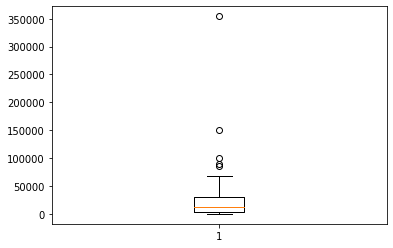

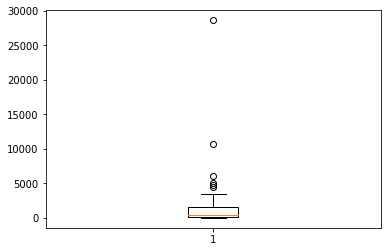

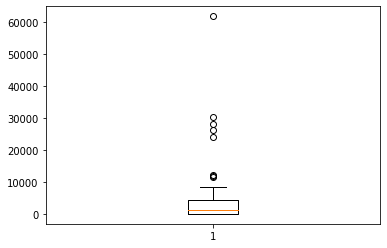

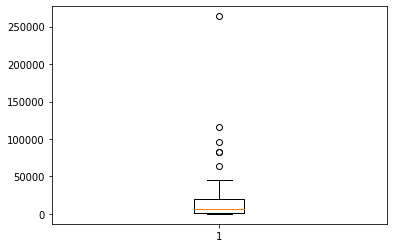

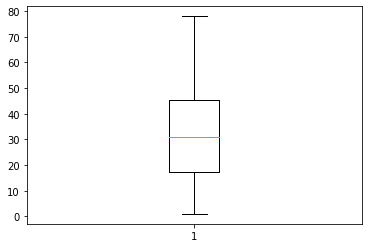

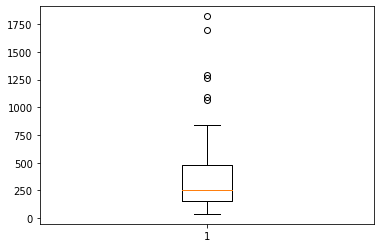

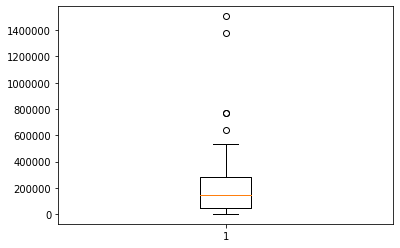

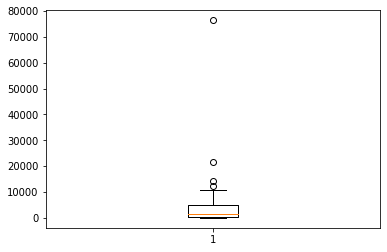

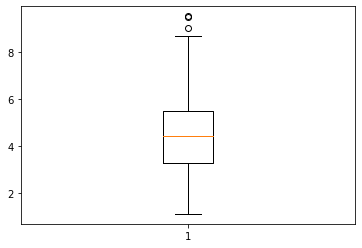

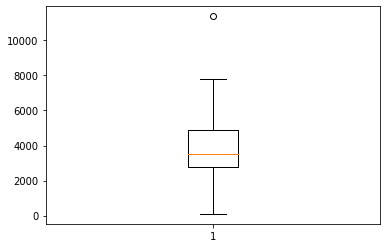

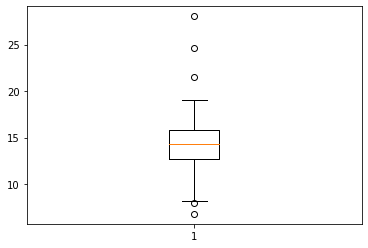

In [17]:
for i in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate']:
    plt.boxplot(df_cov[i])
    plt.show()

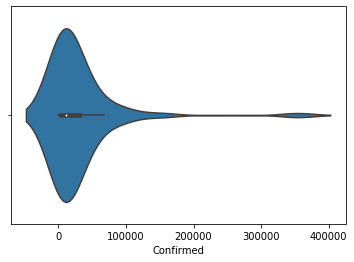

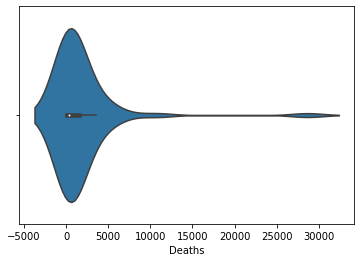

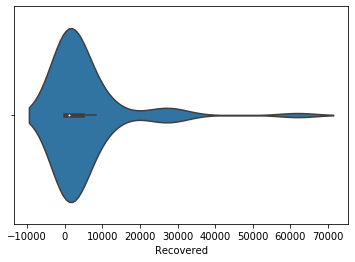

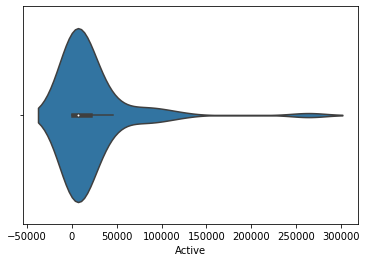

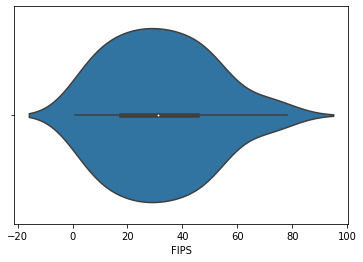

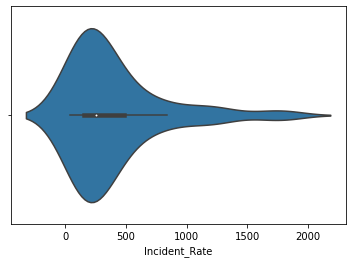

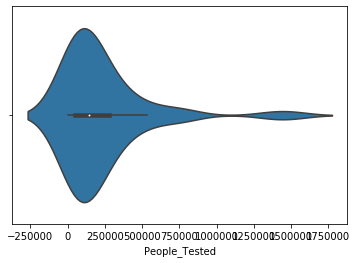

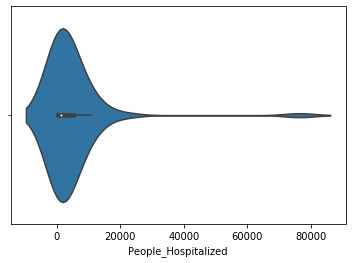

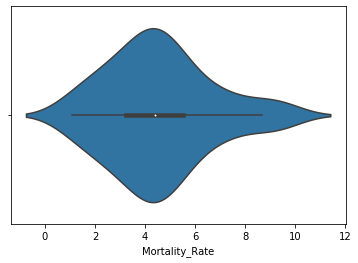

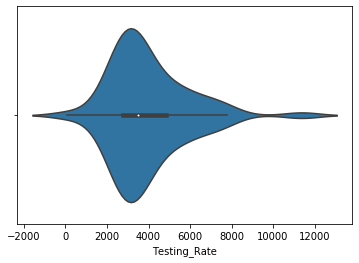

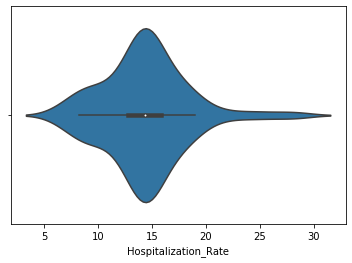

In [18]:
for i in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate']:
    sns.violinplot(x=i,data=df_cov)
    plt.show()

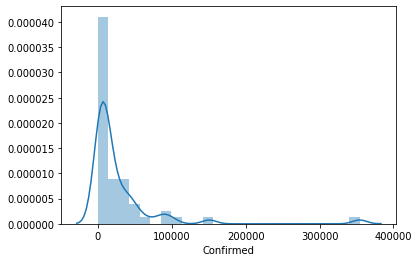

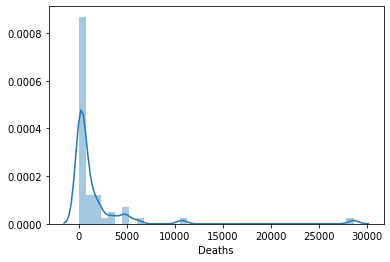

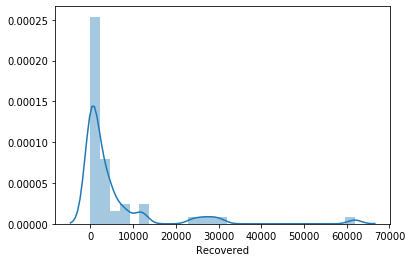

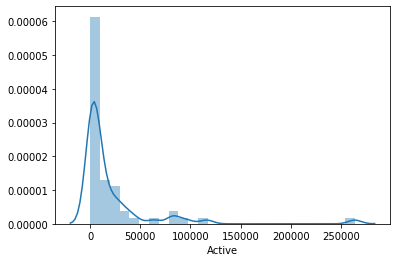

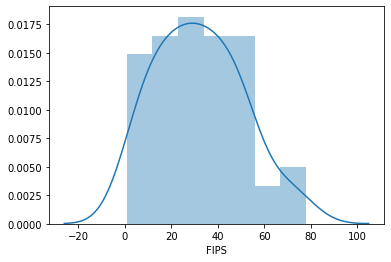

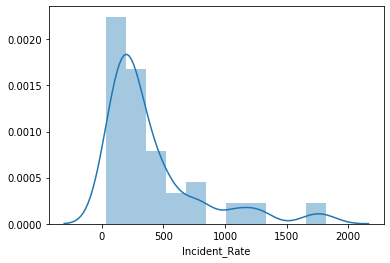

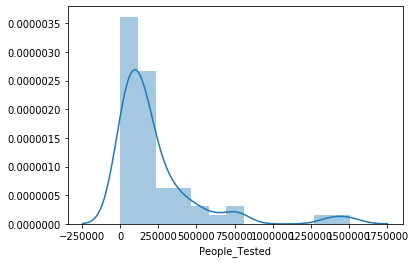

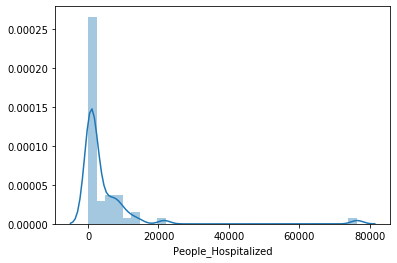

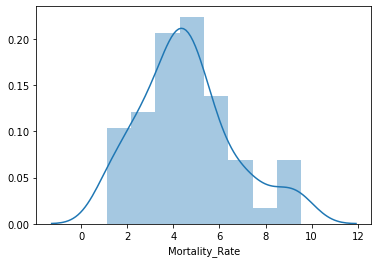

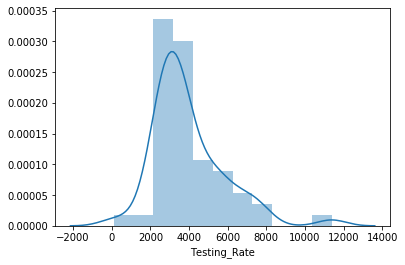

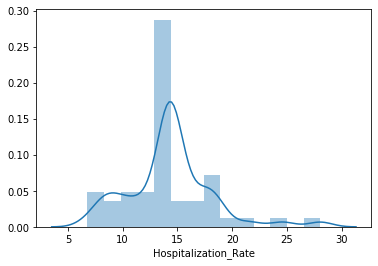

In [19]:
#Checking for the distribution of the data
for i in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate', 'Hospitalization_Rate']:
    sns.distplot(df_cov[i],bins='auto')
    plt.show()

# Bivariate Analysis

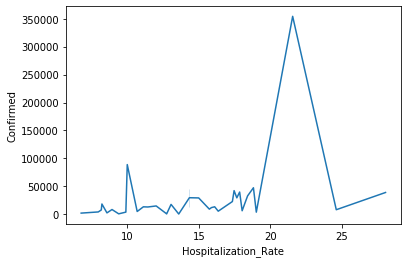

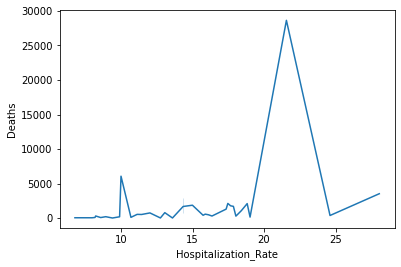

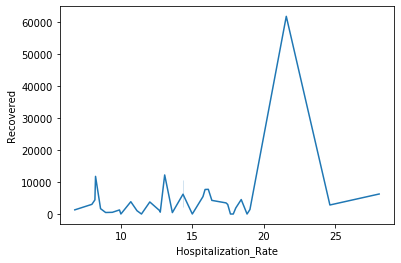

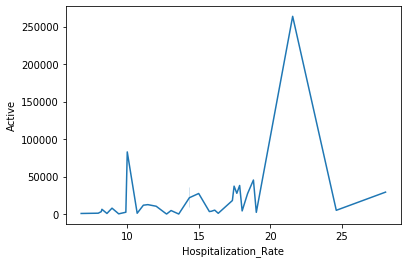

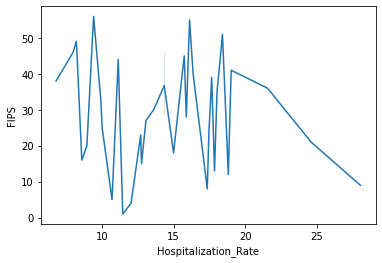

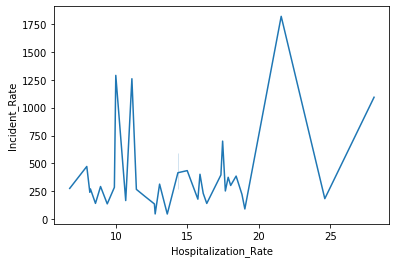

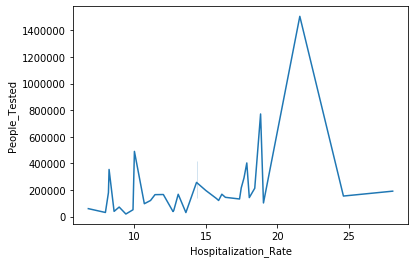

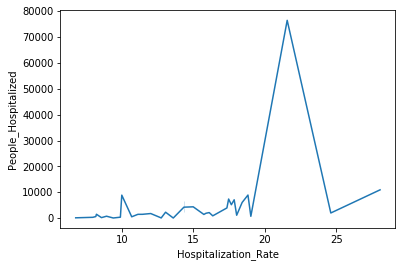

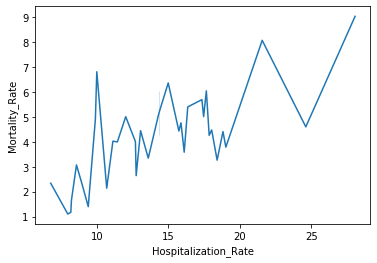

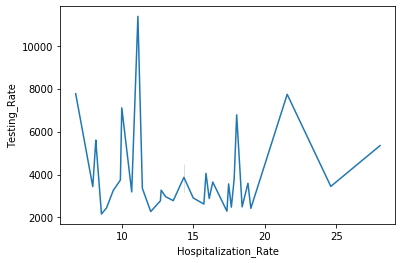

In [20]:
for i in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate',
       'Testing_Rate']:
    sns.lineplot(df_cov['Hospitalization_Rate'],df_cov[i])
    plt.show()
#Highly correlated

In [21]:
#Checking the correlation between the attributes
df_cov.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.570065,0.098689,0.110710,0.056667,0.100299,-0.331101,0.210072,0.024969,0.088682,-0.189675,7.186381e-01,0.194446,-8.611131e-02
Long_,-0.570065,1.000000,-0.006640,0.016533,-0.023550,-0.004159,0.433423,0.010608,-0.105068,0.004654,0.318569,-7.141606e-01,0.138546,7.338798e-02
Confirmed,0.098689,-0.006640,1.000000,0.982353,0.753436,0.985028,-0.091928,0.710461,0.827191,0.979712,0.375722,1.446303e-01,0.327662,2.895525e-01
Deaths,0.110710,0.016533,0.982353,1.000000,0.780137,0.954112,-0.061217,0.712258,0.741134,0.983774,0.427860,1.125758e-01,0.343456,2.995195e-01
Recovered,0.056667,-0.023550,0.753436,0.780137,1.000000,0.629390,0.026755,0.517797,0.594916,0.771440,0.295935,1.412615e-01,0.262147,2.073681e-01
Active,0.100299,-0.004159,0.985028,0.954112,0.629390,1.000000,-0.117599,0.702805,0.829018,0.954550,0.361037,1.372631e-01,0.316773,2.864384e-01
FIPS,-0.331101,0.433423,-0.091928,-0.061217,0.026755,-0.117599,1.000000,-0.199669,-0.178254,-0.071207,0.057172,-5.870748e-01,-0.044428,-1.114244e-01
Incident_Rate,0.210072,0.010608,0.710461,0.712258,0.517797,0.702805,-0.199669,1.000000,0.434094,0.661688,0.373338,2.315672e-01,0.612139,1.978097e-01
People_Tested,0.024969,-0.105068,0.827191,0.741134,0.594916,0.829018,-0.178254,0.434094,1.000000,0.778941,0.231301,2.136205e-01,0.212496,2.540258e-01
People_Hospitalized,0.088682,0.004654,0.979712,0.983774,0.771440,0.954550,-0.071207,0.661688,0.778941,1.000000,0.362642,1.188138e-01,0.308422,3.558849e-01


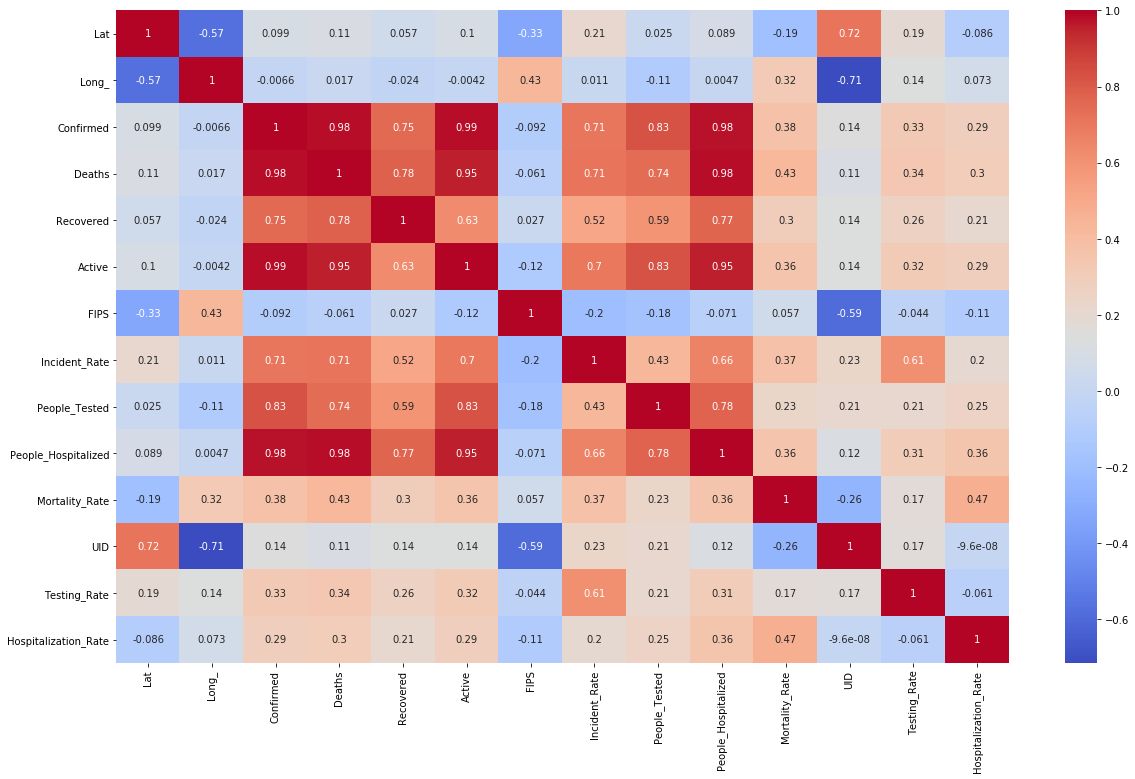

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cov.corr(),cmap='coolwarm',annot=True)
plt.show()

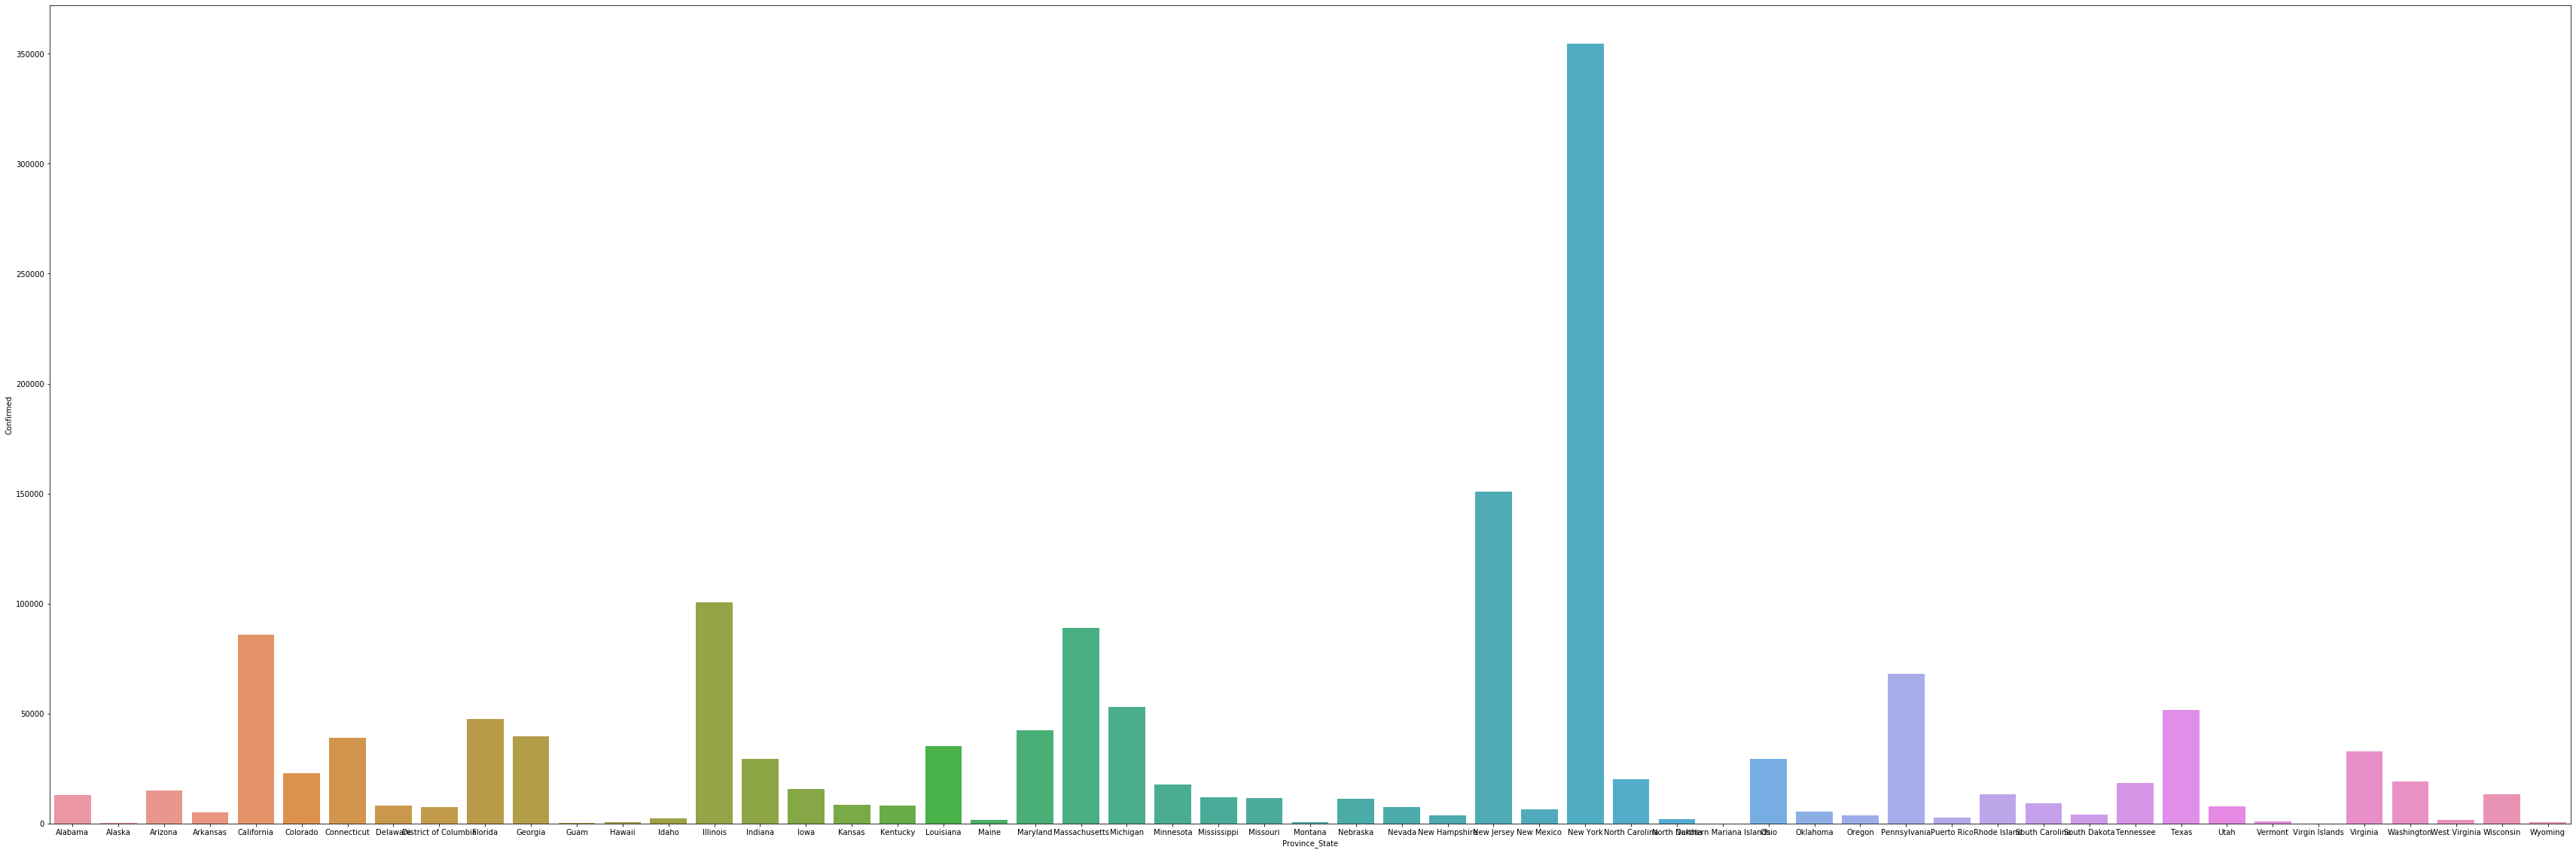

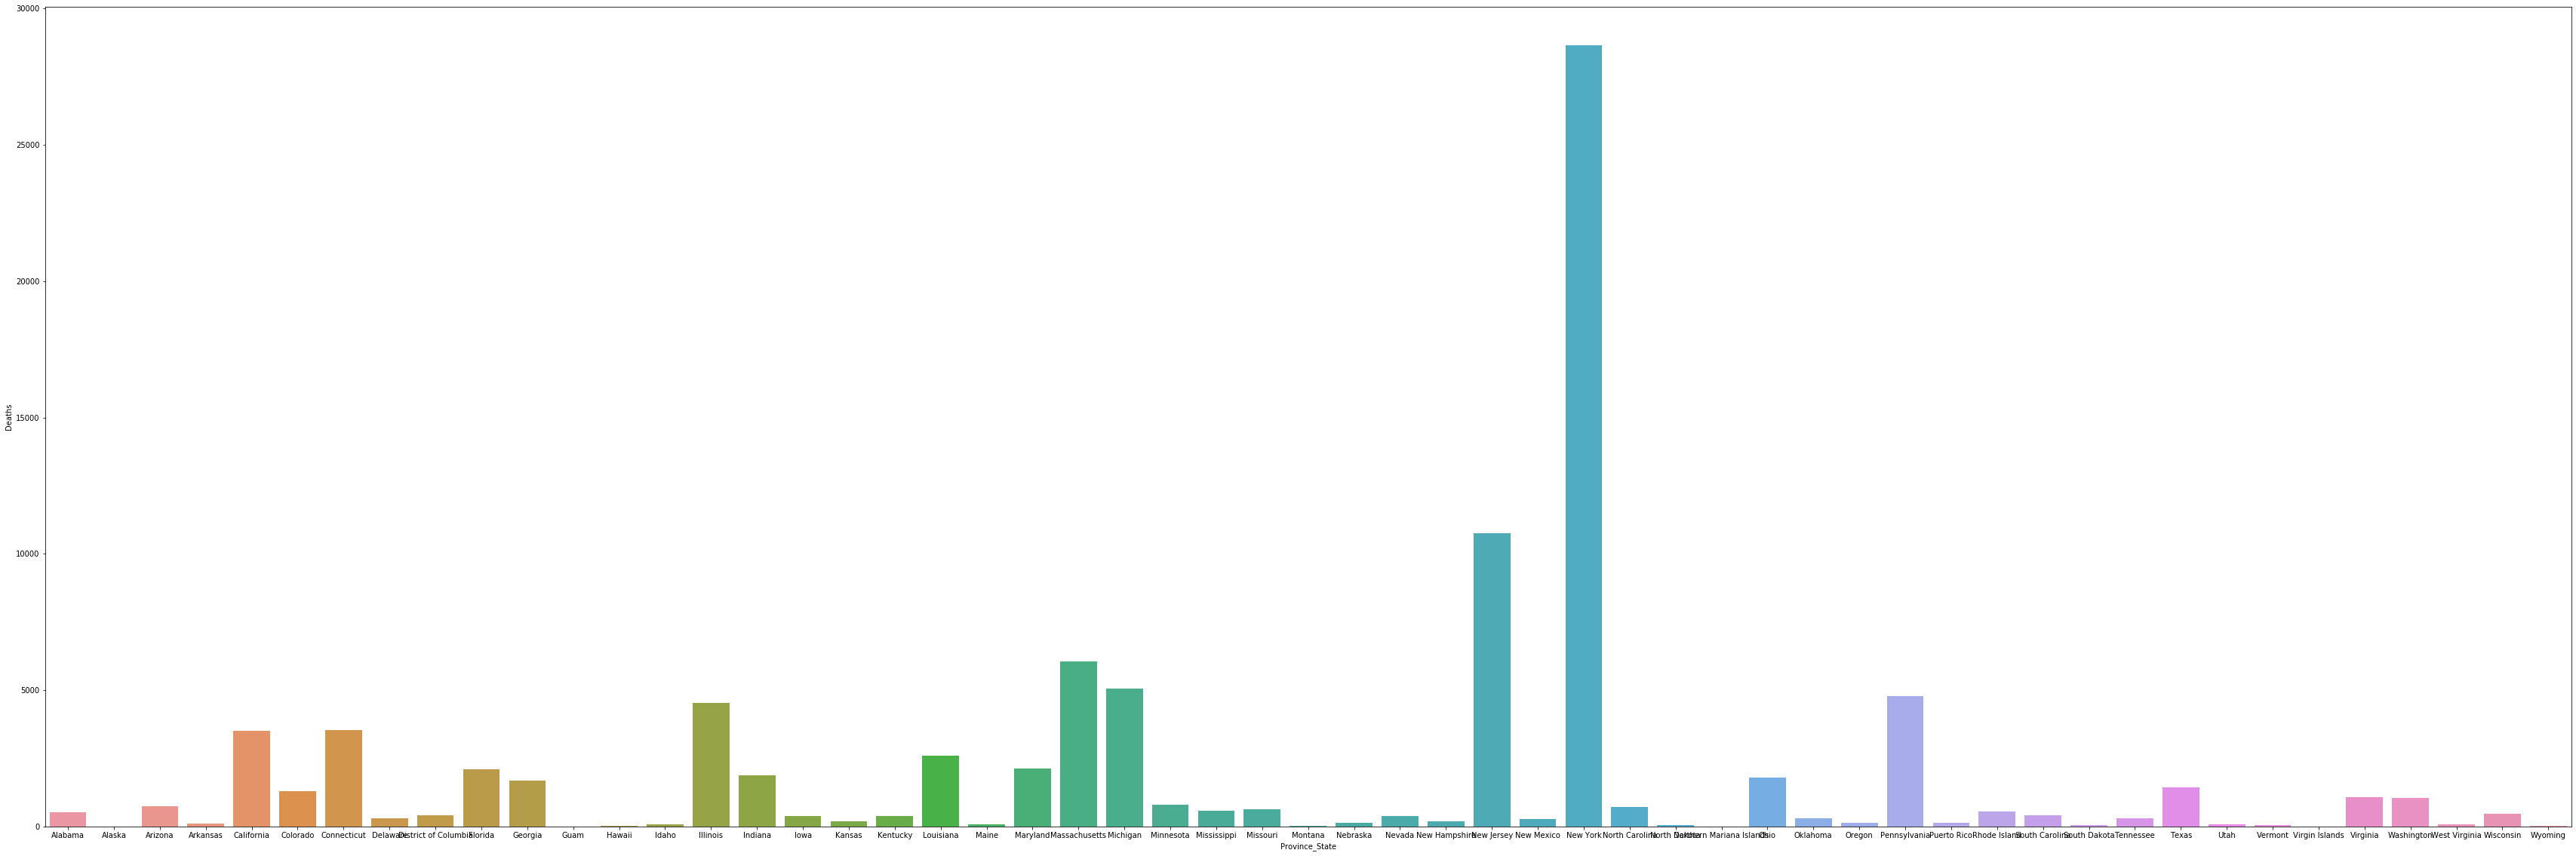

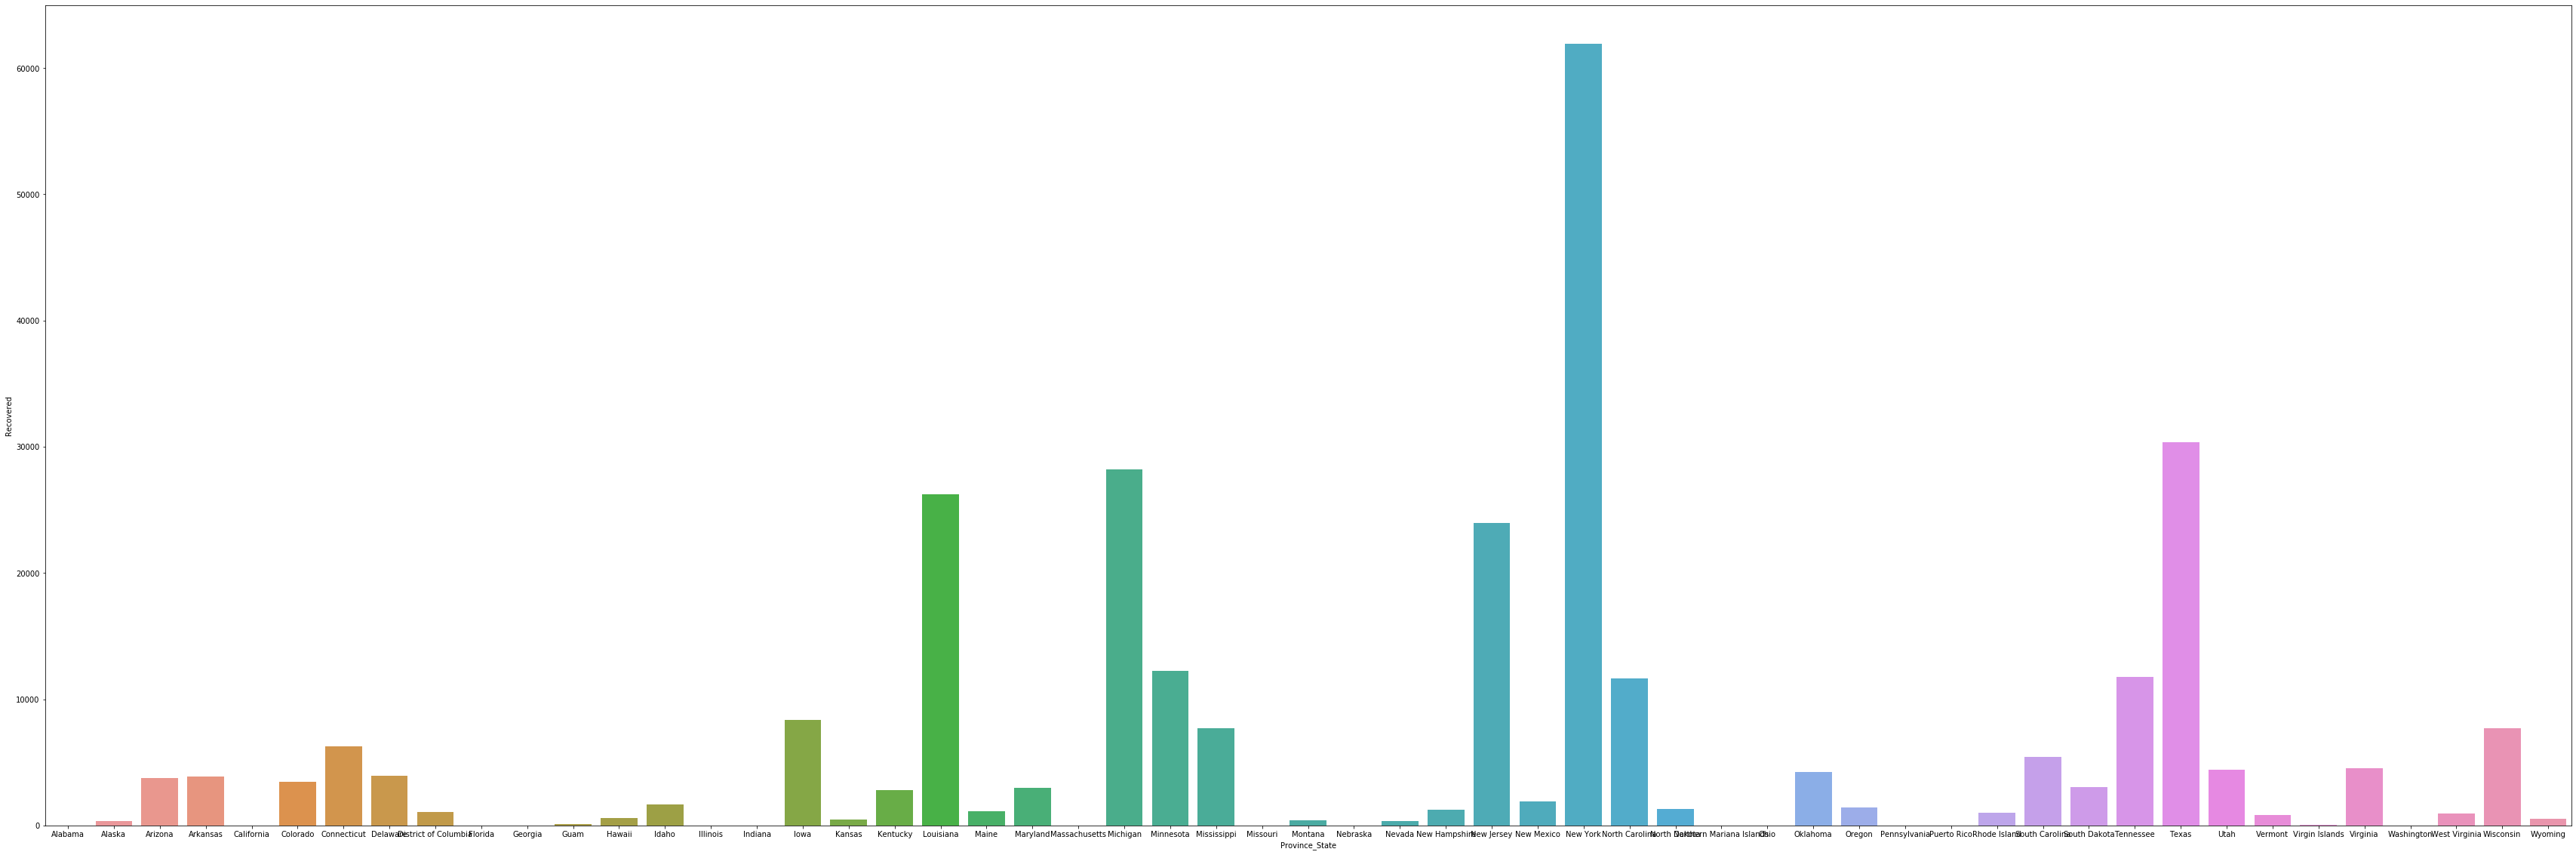

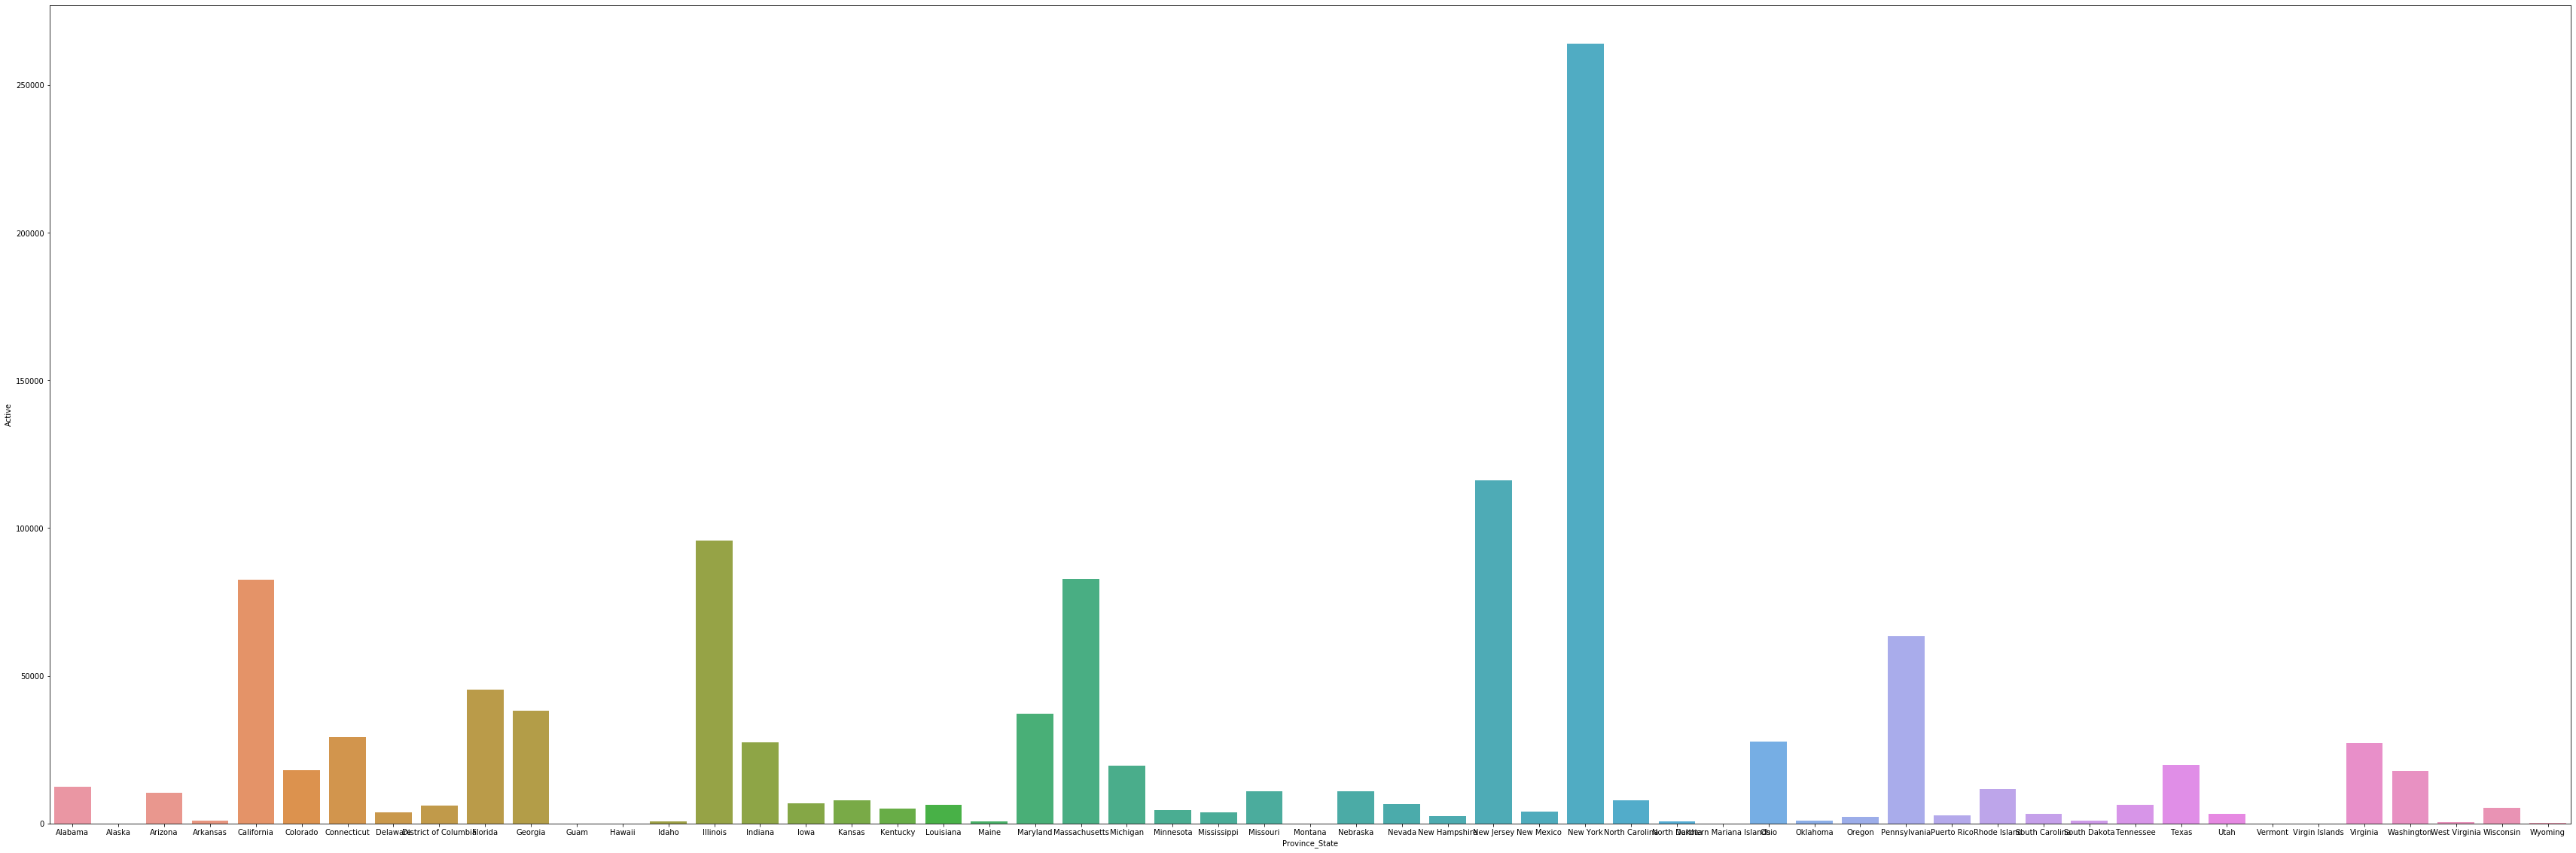

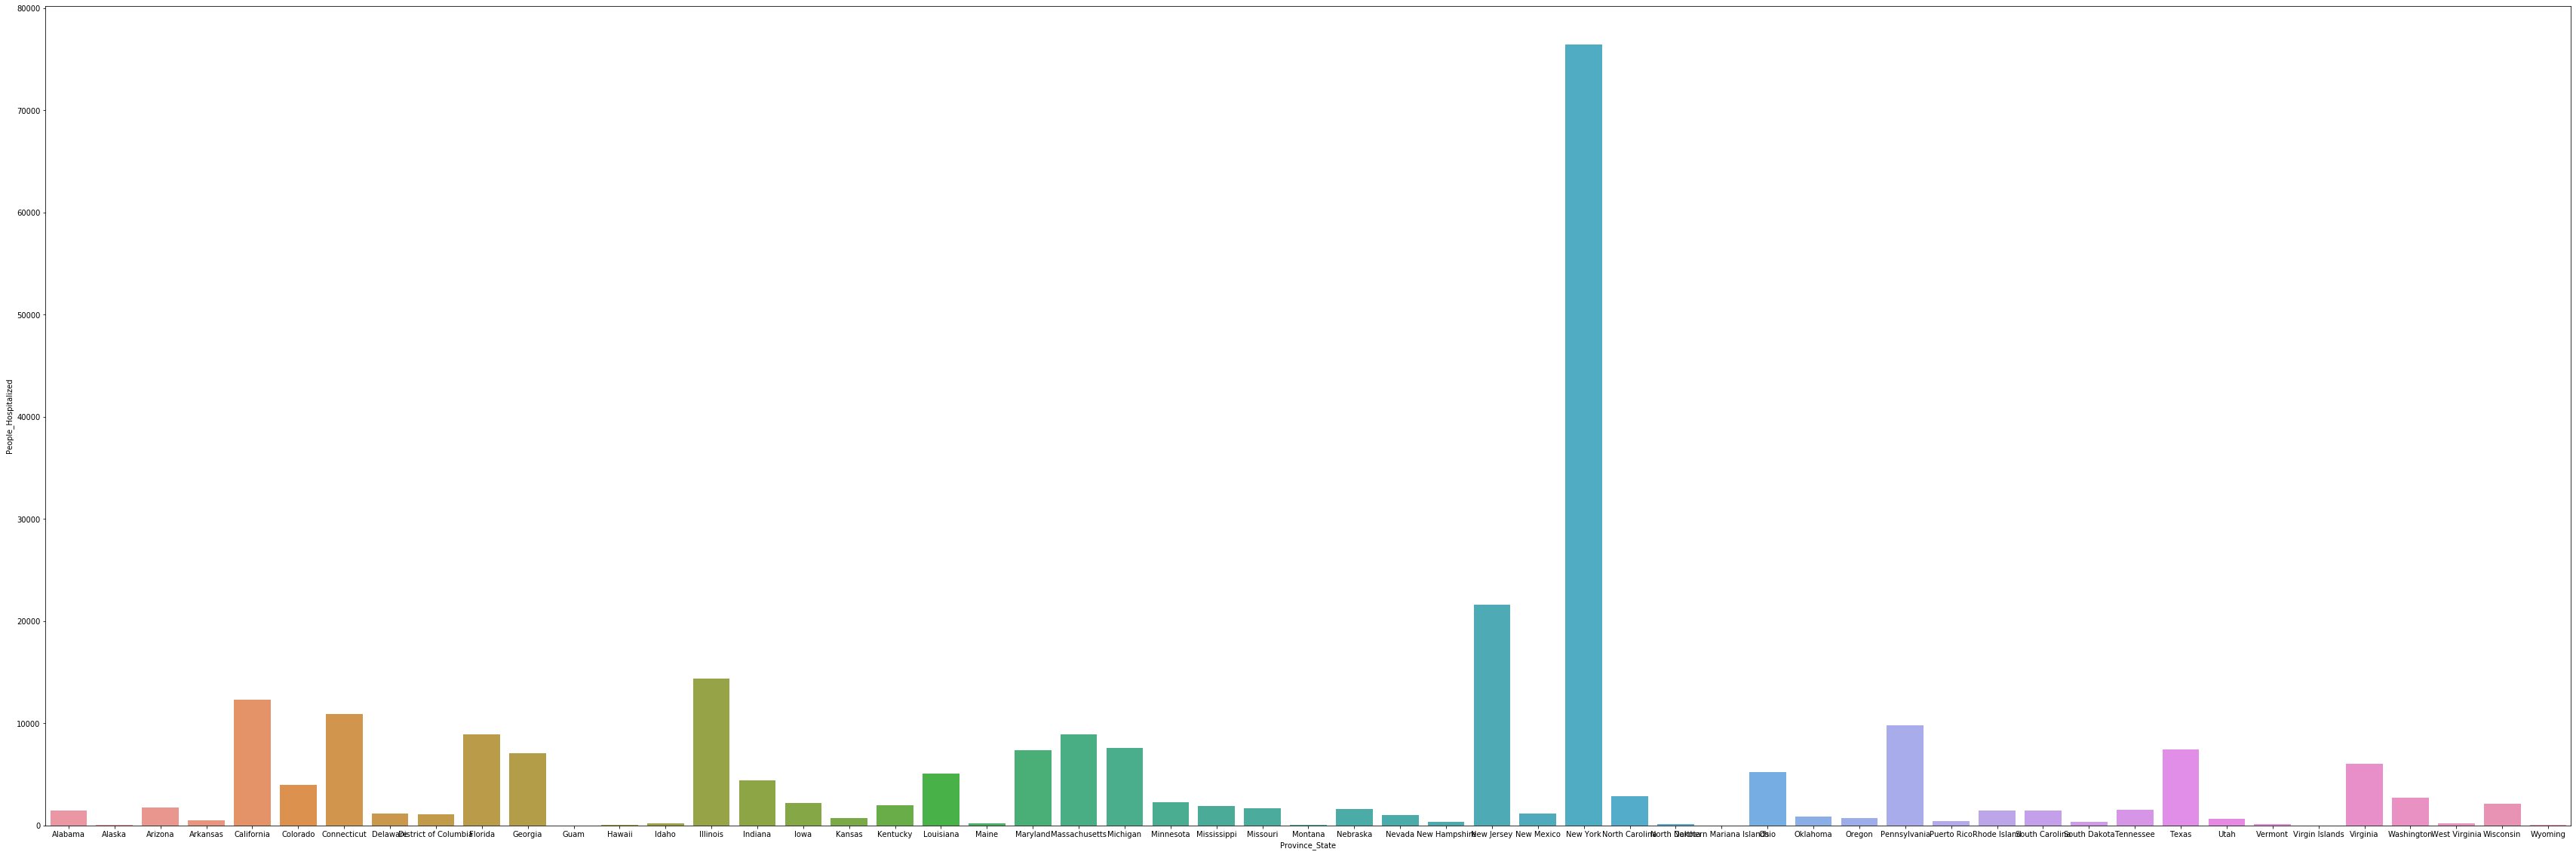

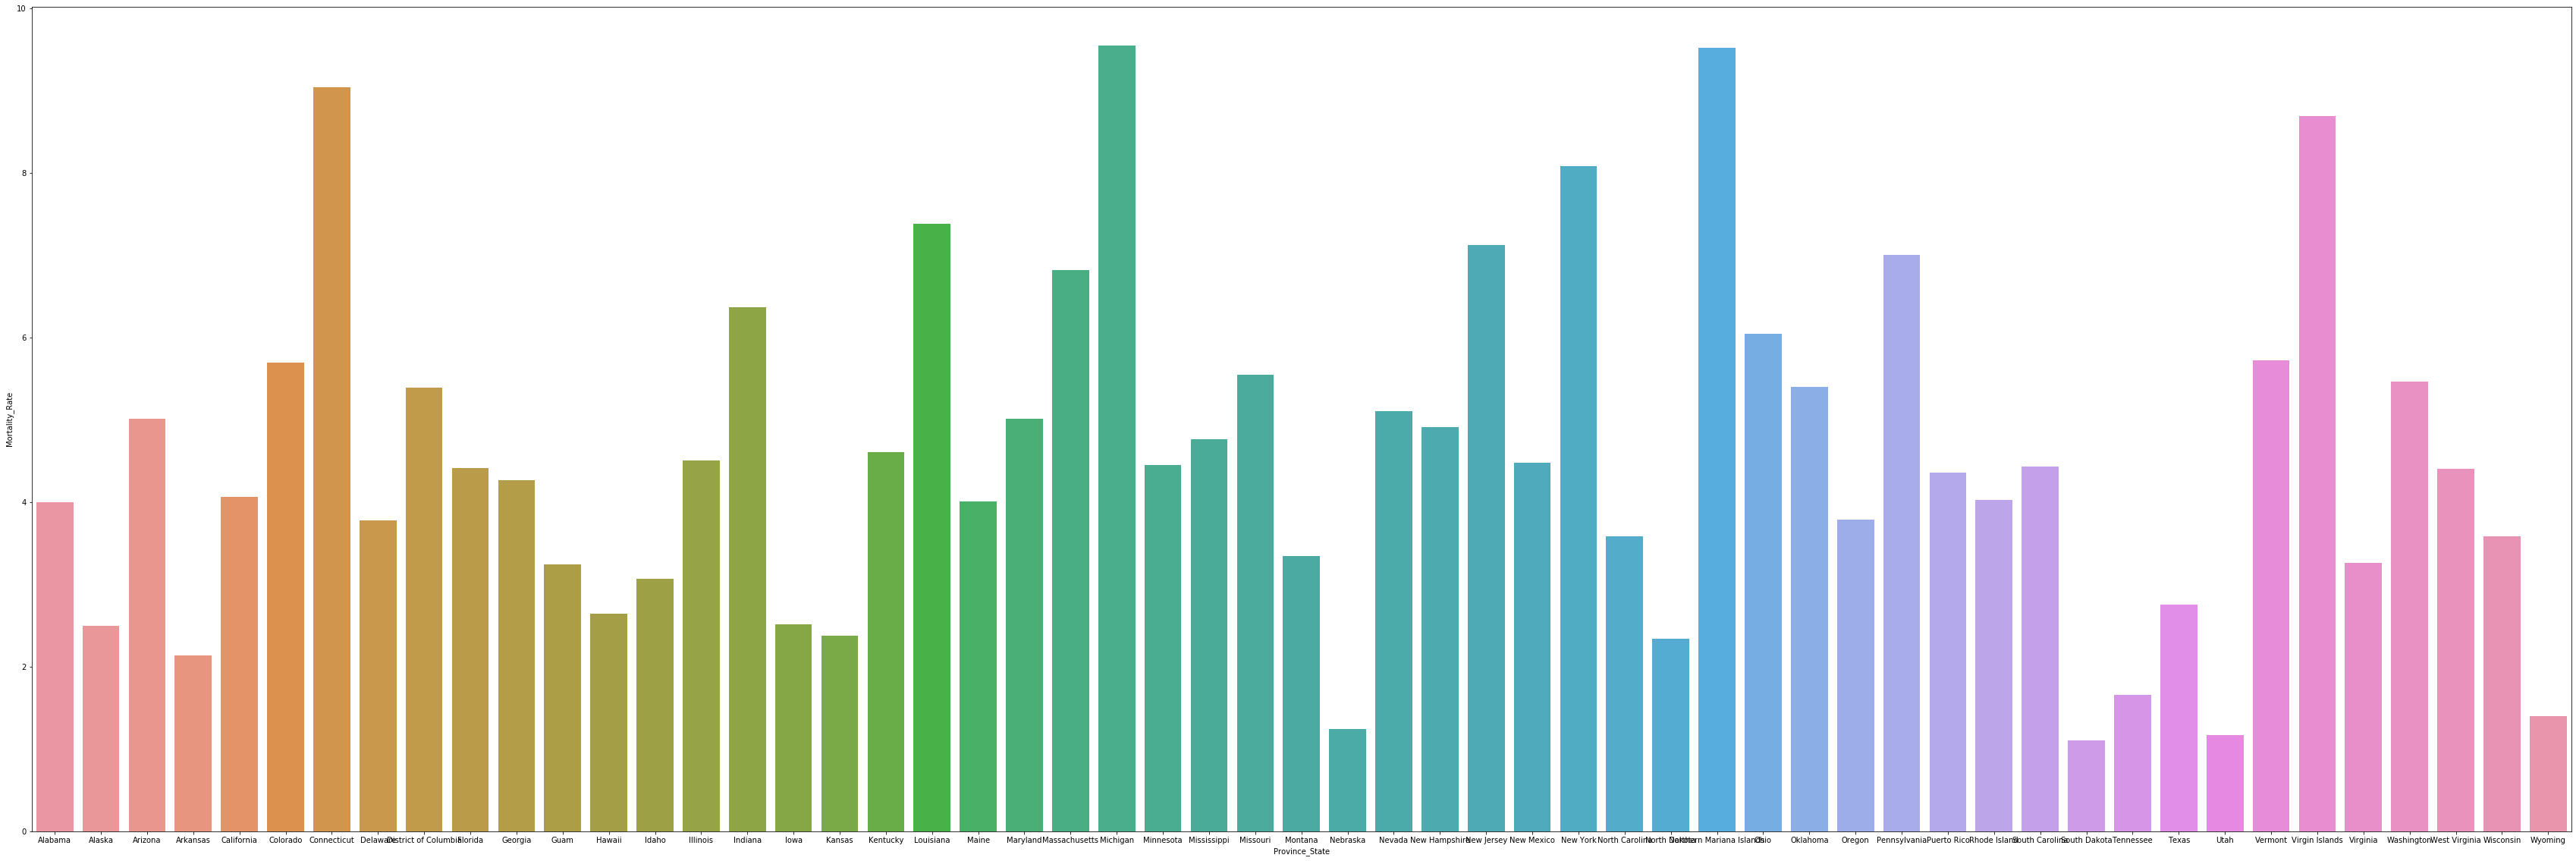

In [42]:
for i in ['Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Hospitalized', 'Mortality_Rate']:
    plt.figure(figsize=(60,20))
    sns.barplot(df_cov['Province_State'],df_cov[i],)
    plt.show()

# Multivariate Analysis

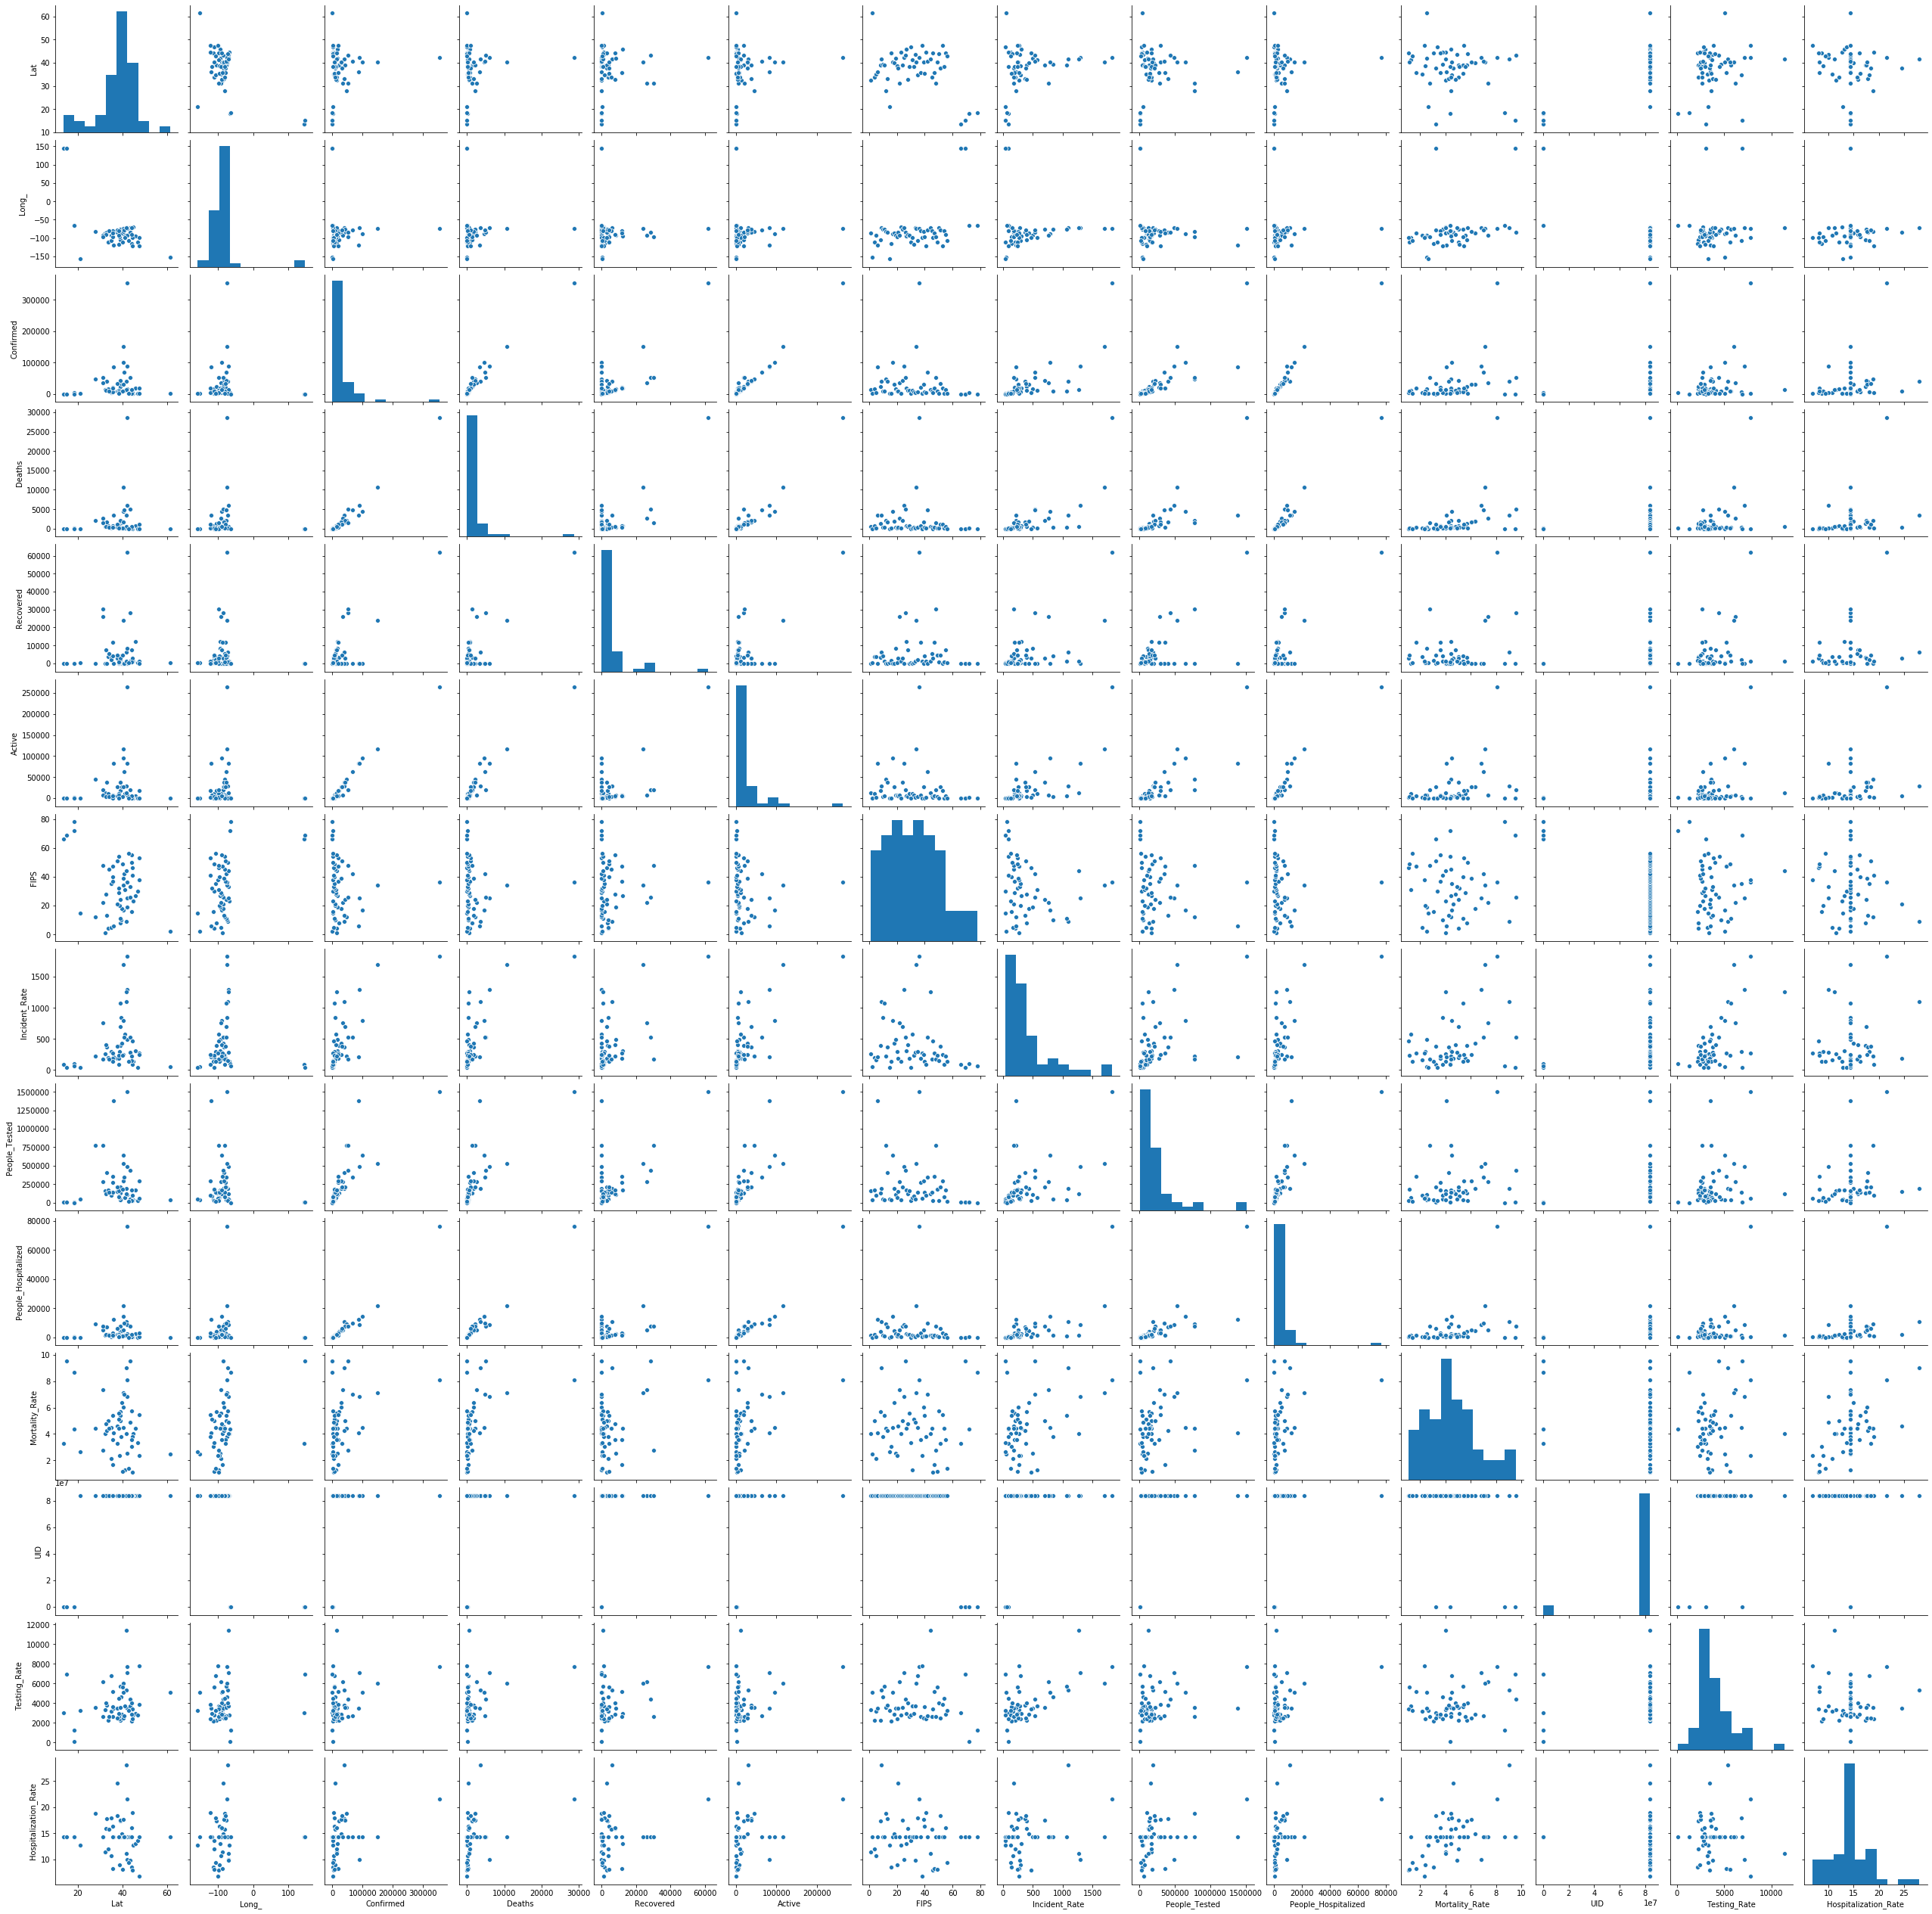

In [148]:
sns.pairplot(df_cov)

In [43]:
#Since Lat,Long_,UID,FIPS has low correlation with Hospitalization_Rate
#'Country_Region' is US,Province_State,Last_Update is 2020/05/21 and ISO3 are not required for the model
#we drop the columns
df_cov.drop(['Lat','Long_','UID','FIPS','ISO3','Country_Region','Province_State','Last_Update'],inplace=True,axis=1)

In [44]:
df_cov.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,0.0,12530.0,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,401,10,352.0,39.0,54.815493,37045.0,57.513591,2.493766,5063.940017,14.342541
3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,5003,107,3852.0,1044.0,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584
5,85997,3497,0.0,82500.0,217.646575,1380120.0,12334.155357,4.066421,3492.893832,14.342541


In [45]:
#Cheking the skewness of data
df_cov.skew()
# From below ouput, we can say Runs,Hits,CG,Saves,Errors have high skewness

Confirmed               4.614978
Deaths                  5.361075
Recovered               3.556028
Active                  4.083998
Incident_Rate           1.955029
People_Tested           2.769517
People_Hospitalized     5.762093
Mortality_Rate          0.591921
Testing_Rate            1.452496
Hospitalization_Rate    0.845855
dtype: float64

In [46]:
#removing skewness using log transform
for col in df_cov.columns:
    if df_cov.skew().loc[col]>0.55:
        df_cov[col]=np.log1p(df_cov[col])

In [47]:
df_cov.skew()
#skewness is reduced

Confirmed              -0.929534
Deaths                 -0.343052
Recovered              -0.752763
Active                 -1.014573
Incident_Rate           0.022996
People_Tested          -0.943518
People_Hospitalized    -0.702968
Mortality_Rate         -0.423575
Testing_Rate           -3.222276
Hospitalization_Rate   -0.274167
dtype: float64

In [48]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_cov))
print(zscore)
print(np.where(zscore>3))
df_cov_new=df_cov[(zscore<3).all(axis=1)]

[[2.28520691e-01 1.96567524e-01 1.63916047e+00 4.78142441e-01
  1.08386576e-02 2.84369000e-01 1.18983008e-01 9.30221659e-02
  5.52899251e-02 7.09015731e-01]
 [1.62529213e+00 1.73950895e+00 1.45295709e-02 1.82751067e+00
  1.73343129e+00 7.64602997e-01 1.54994266e+00 1.01524854e+00
  6.03815520e-01 1.23643219e-01]
 [2.99264241e-01 3.75963203e-01 6.41646724e-01 4.02859520e-01
  2.98089401e-01 2.88571891e-01 2.12955751e-01 3.81411028e-01
  6.77669783e-01 5.27187031e-01]
 [2.82179128e-01 5.94295363e-01 6.47383883e-01 5.18481235e-01
  5.29273565e-01 9.25623053e-02 4.09042913e-01 1.29105561e+00
  1.35622090e-01 9.54225272e-01]
 [1.23273965e+00 1.14932550e+00 1.63916047e+00 1.23422100e+00
  2.31419852e-01 1.78156059e+00 1.20637394e+00 5.87430166e-02
  9.64687347e-03 1.23643219e-01]
 [5.25558695e-01 6.53070530e-01 6.19106824e-01 6.23906506e-01
  4.24371044e-01 1.28803155e-01 6.20582925e-01 6.59797084e-01
  6.66114642e-01 8.33784130e-01]
 [8.11781363e-01 1.15389109e+00 7.82009378e-01 8.17875006e

In [49]:
print('Before removing outliers:',df_cov.shape)
print('After removing outliers:',df_cov_new.shape)

Before removing outliers: (55, 10)
After removing outliers: (52, 10)


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_cov_final=sc.fit_transform(df_cov_new)
df_cov_final=pd.DataFrame(df_cov_final,columns=df_cov_new.columns)

In [51]:
df_cov_final.skew()
#skewness reduced further

Confirmed              -0.474239
Deaths                 -0.237479
Recovered              -0.894874
Active                 -0.808368
Incident_Rate           0.073392
People_Tested          -0.254414
People_Hospitalized    -0.348969
Mortality_Rate         -0.499709
Testing_Rate            0.840242
Hospitalization_Rate   -0.246039
dtype: float64

In [52]:
#separating into input and output variables
x=df_cov_final.drop(columns=['Hospitalization_Rate'])
y=pd.DataFrame(df_cov_final['Hospitalization_Rate'])

In [53]:
#checking the shape
x.shape

(52, 9)

In [54]:
y.shape

(52, 1)

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [56]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.9997725526334089
r2 score corresponding to 43 is 0.9995127093978337
r2 score corresponding to 44 is 0.999750043654882
r2 score corresponding to 45 is 0.9990893801814
r2 score corresponding to 46 is 0.9994588685928926
r2 score corresponding to 47 is 0.9997254054546968
r2 score corresponding to 48 is 0.9959571567920623
r2 score corresponding to 49 is 0.9997402706571874
r2 score corresponding to 50 is 0.9996013094734192
r2 score corresponding to 51 is 0.9995973636284294
r2 score corresponding to 52 is 0.9998017188496129
r2 score corresponding to 53 is 0.9993243906645094
r2 score corresponding to 54 is 0.9996968422746304
r2 score corresponding to 55 is 0.9996311473732904
r2 score corresponding to 56 is 0.9995735748097903
r2 score corresponding to 57 is 0.9995600022985831
r2 score corresponding to 58 is 0.999155946693137
r2 score corresponding to 59 is 0.9996224874500501
r2 score corresponding to 60 is 0.9993830357738422
r2 score corresponding to 61 is 0.99

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 21}

In [175]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=21)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.2199550416391316
r2 score corresponding to 43 is 0.07554943166986627
r2 score corresponding to 44 is 0.1408854643329982
r2 score corresponding to 45 is -0.17570549081170106
r2 score corresponding to 46 is -0.009152470649768096
r2 score corresponding to 47 is 0.18095480016677945
r2 score corresponding to 48 is -0.004659097727985451
r2 score corresponding to 49 is -0.10746141833799627
r2 score corresponding to 50 is 0.14891465150747485
r2 score corresponding to 51 is 0.016787441387974167
r2 score corresponding to 52 is 0.1287127438536213
r2 score corresponding to 53 is 0.19240330778357606
r2 score corresponding to 54 is 0.10391582092291762
r2 score corresponding to 55 is 0.18741132853338227
r2 score corresponding to 56 is -0.5834755725779102
r2 score corresponding to 57 is 0.18005678525608926
r2 score corresponding to 58 is 0.15886260399526886
r2 score corresponding to 59 is 0.1255944564904209
r2 score corresponding to 60 is -0.034071938819978165
r2 scor

In [58]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.9992491294229154
Standard Deviation in r2 score for Linear Regression: 0.0004437016687158443

Mean r2 score for KNN Regression: -0.46749288840382724
Standard Deviation in r2 score for KNN Regression: 1.3644637178094114


In [59]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [60]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.9998198933242616
r2 score corresponding to 43 is 0.9981974129334547
r2 score corresponding to 44 is 0.9988912759432089
r2 score corresponding to 45 is 0.9993529056333279
r2 score corresponding to 46 is 0.9981102289623515
r2 score corresponding to 47 is 0.9992268940435056
r2 score corresponding to 48 is 0.9967052767874973
r2 score corresponding to 49 is 0.9992955990507741
r2 score corresponding to 50 is 0.9993201246487844
r2 score corresponding to 51 is 0.9989419909689966
r2 score corresponding to 52 is 0.9990817426866052
r2 score corresponding to 53 is 0.9992198187317758
r2 score corresponding to 54 is 0.9997388042567716
r2 score corresponding to 55 is 0.998339333649469
r2 score corresponding to 56 is 0.9993993896122518
r2 score corresponding to 57 is 0.9996765210051284
r2 score corresponding to 58 is 0.9987938273428576
r2 score corresponding to 59 is 0.9985229455810903
r2 score corresponding to 60 is 0.9980155928371187
r2 score corresponding to 61 is 

In [61]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.9982145932701696
Standard Deviation in r2 score for Lasso Regression: 0.0017478643397418068


In [62]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [63]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=0.001)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.9997288711298759
r2 score corresponding to 43 is 0.9996146650124854
r2 score corresponding to 44 is 0.9997976091258244
r2 score corresponding to 45 is 0.9992993356143057
r2 score corresponding to 46 is 0.9995012495621995
r2 score corresponding to 47 is 0.9998179731293209
r2 score corresponding to 48 is 0.9968757467723887
r2 score corresponding to 49 is 0.9998118594752083
r2 score corresponding to 50 is 0.9996243434535421
r2 score corresponding to 51 is 0.9997055445382294
r2 score corresponding to 52 is 0.9997758324848505
r2 score corresponding to 53 is 0.9994019899417065
r2 score corresponding to 54 is 0.9997102486642571
r2 score corresponding to 55 is 0.9996450006226887
r2 score corresponding to 56 is 0.9995051655629479
r2 score corresponding to 57 is 0.9994749142326307
r2 score corresponding to 58 is 0.9992790313016755
r2 score corresponding to 59 is 0.999689729402972
r2 score corresponding to 60 is 0.9995502019606615
r2 score corresponding to 61 is 

In [64]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.9991852016182555
Standard Deviation in r2 score for Ridge Regression: 0.0005046879254377829


In [65]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 150}

In [66]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=150)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: -0.1340835536592929
Standard Deviation in r2 score for Gradient Boosting Regression: 0.15065297381016957


In [67]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 200}

In [68]:
ada_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.001,n_estimators=200)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.999326337254263
Standard Deviation in r2 score for Ada Boost Regression: 0.0003780975683635798


In [69]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.999767324121978
r2 score corresponding to 43 is 0.9996940974420718
r2 score corresponding to 44 is 0.9998105885309958
r2 score corresponding to 45 is 0.99945933782205
r2 score corresponding to 46 is 0.9995569027998096
r2 score corresponding to 47 is 0.9997978346694162
r2 score corresponding to 48 is 0.9959909479065351
r2 score corresponding to 49 is 0.999814653745814
r2 score corresponding to 50 is 0.9996448354749766
r2 score corresponding to 51 is 0.9996886887871295
r2 score corresponding to 52 is 0.9998400214673386
r2 score corresponding to 53 is 0.999425663524457
r2 score corresponding to 54 is 0.9997326691993589
r2 score corresponding to 55 is 0.99960893651324
r2 score corresponding to 56 is 0.9997682296409762
r2 score corresponding to 57 is 0.9996641303188518
r2 score corresponding to 58 is 0.9991738139699234
r2 score corresponding to 59 is 0.999678616914869
r2 score corresponding to 60 is 0.9995448038700636
r2 score corresponding to 61 is 0.99873

In [70]:
#We tried all methods and till now Ridge Regression is the best option 
#Random state corresponding to highest r2 score is 66
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.20)
rdreg=Ridge(alpha=0.001)
rdreg.fit(x_train,y_train)
y_pred=rdreg.predict(x_test)
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.9991852016182555
Standard Deviation in r2 score for Ridge Regression: 0.0005046879254377829


In [71]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.009124169894944112
r2 score is: 0.9999181629472396


In [72]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(rdreg,"Project9_Covid.pkl")

['Project9_Covid.pkl']